<a href="https://colab.research.google.com/github/Harshi141006/codsoft/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Step 2: Load the Dataset

In [ ]:
df = pd.read_csv("/content/archive (4).zip")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Step 3: Data Exploration

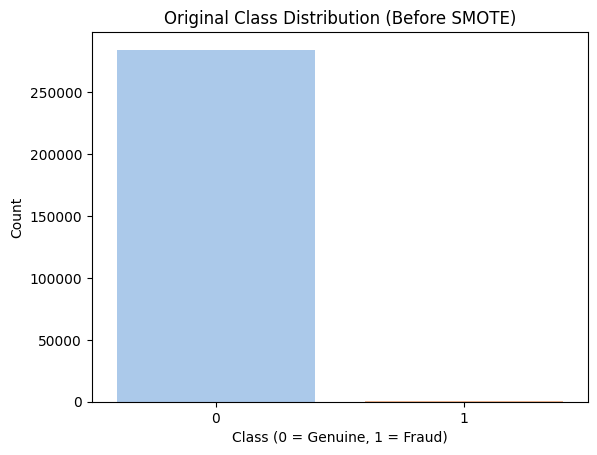

In [ ]:
sns.countplot(data=df, x='Class', hue='Class', palette='pastel', legend=False)
plt.title("Original Class Distribution (Before SMOTE)")
plt.xlabel("Class (0 = Genuine, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Step 4: Preprocessing - Scale 'Amount' and 'Time'





In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
print("First 5 scaled values of 'Amount':")
print(df['Amount'].head())
df['Time'] = scaler.fit_transform(df[['Time']])
print("\nFirst 5 scaled values of 'Time':")
print(df['Time'].head())

First 5 scaled values of 'Amount':
0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

First 5 scaled values of 'Time':
0   -1.996583
1   -1.996583
2   -1.996562
3   -1.996562
4   -1.996541
Name: Time, dtype: float64


# step 5: Define features and target

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (284807, 30)
Shape of y: (284807,)


# Step 6:  Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train: (227845, 30)
Shape of X_test : (56962, 30)
Shape of y_train: (227845,)
Shape of y_test : (56962,)


# Step 7:  Apply SMOTE to balance the training set

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
from imblearn.over_sampling import SMOTE
print("Before SMOTE:")
print("Class distribution in y_train:")
print(y_train.value_counts())
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("\nAfter SMOTE:")
print("Class distribution in y_res:")
print(y_res.value_counts())
print("X_res shape:", X_res.shape)
print("y_res shape:", y_res.shape)

Before SMOTE:
Class distribution in y_train:
Class
0    227451
1       394
Name: count, dtype: int64
X_train shape: (227845, 30)
y_train shape: (227845,)

After SMOTE:
Class distribution in y_res:
Class
0    227451
1    227451
Name: count, dtype: int64
X_res shape: (454902, 30)
y_res shape: (454902,)


# Step 8: Explore Balanced Class Distribution

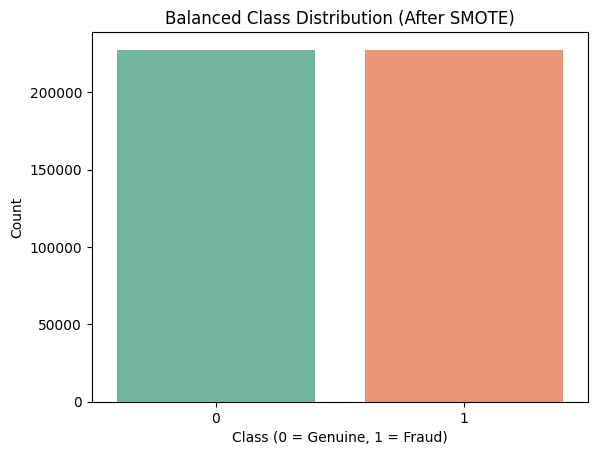

In [ ]:
sns.countplot(x=y_res, hue=y_res, palette='Set2', legend=False)
plt.title("Balanced Class Distribution (After SMOTE)")
plt.xlabel("Class (0 = Genuine, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Step 9: Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_res, y_res)
print("Logistic Regression model has been trained.")
y_pred = lr.predict(X_test)
print("\nFirst 10 predictions on X_test:")
print(y_pred[:10])
print("\nShape of y_pred:", y_pred.shape)
print("Shape of y_test:", y_test.shape)

Logistic Regression model has been trained.

First 10 predictions on X_test:
[1 0 0 0 0 0 0 0 0 0]

Shape of y_pred: (56962,)
Shape of y_test: (56962,)


# Step 10: Evaluation - Confusion Matrix

Confusion Matrix:
 [[55423  1441]
 [    7    91]]


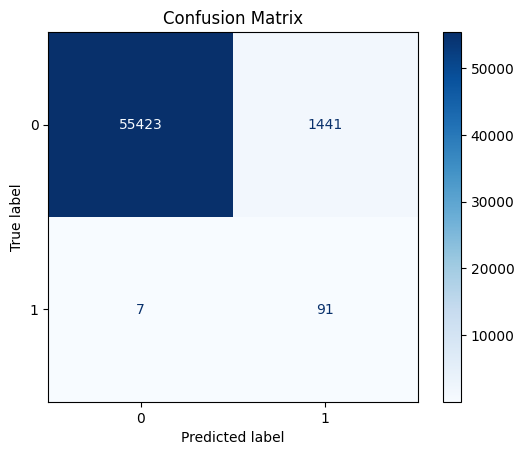

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Step 11: Evaluation - Classification Report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



# Step 12: ROC Curve and AUC

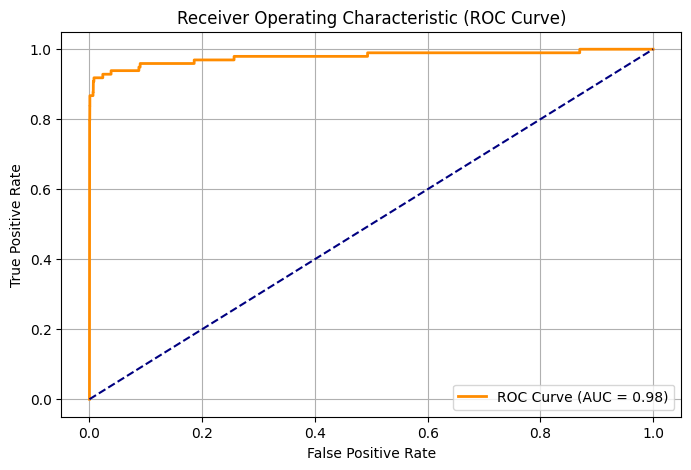

In [ ]:
from sklearn.metrics import roc_curve, auc
y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend(loc="lower right")
plt.grid()
plt.show()